# Problem statement

In order to reduce customer churn rates a prediction model was developed to forecast the likelihood of customer churn. Understanding the reasons behind customer churn is essential for reducing marketing costs, maintaining brand loyalty, and ensuring long-term profitability. This report, analyzes factors affecting customer churn and identifies the most predictive factors to optimize customer retention.  

## Variable 1
This analysis concludes the most indicative factor predicting customer churn is if customers have a month-to-month contract. Based on the analysis the longer customers have a contract the less likely they are to churn. This is likely due to the fact consumers with month-to-month contracts have an easier time terminating their contracts. Possibly because they are less dependent on the services provided. Customers with month-to-month contracts may have signed up for promotional offers and then discontinued their subscription once they had to pay full price. 

## Variable  2
Another factor impacting customer churn is their monthly total ratio this variable depicts customers retention by comparing how much a customer pays each month with how much they have paid in total. Customers that have higher monthly total ratios have been with the company longer and therefore are less likely to churn. 


## Variable  3
An additional factor impacting customer churn is their estimated salary in combination with whether customers have the Internet plan that includes fiber optic cables. Fiber optic cables are the most stable and the fastest way for consumers to receive an Internet connection. While at this time there is no irrefutable explanation to why customers with fiber optic Internet are leaving, it may be because they have high standards for their Internet connection. Thereby being more apt to switch providers when given the opportunity. The higher the customers’ salary, the more likely they are to churn. This might be due to the fact not many premium packages are offered compared to competitors making the Internet deal budget friendly for low income demographics only.  

# Results
After extensive analysis, it is  recommended to create annual bundles that include fiber optic cables and more premium products. Adding fiber optic cables into annual packages will save customers money long term and increase their satisfaction and retention rates. Creating a promotion where customers purchase 11 months of internet and get the 12th month free has a high potential to reduce churn by locking in customers for as long as possible. In order to target a wider array of income ranges and reduce high earning customers' churn, it is recommended to expand offerings to include premium products and services. Next it is recommended to create the option for an all-inclusive or unlimited plan that enables customers to have all products and the highest quality services. This unlimited plan will be targeting high income individuals with multiple lines. Lastly, it is advisable to create the opportunity to upgrade existing customers and develop loyalty programs. This initiative will target the original market; low income college students. Offering a wide variety of high quality options has the potential to attract a new demographic and retain current customers as they transition into the workforce and start earning more.  

# Assumptions made
The first assumption made in this report was that the company is an affordable internet provider offering a limited number of services to low income individuals like college students. The other assumption made was that there was some kind of promotion or incentive for customers using a month to month plan.  

# Limitations

It is also important to recognize the potential limitations of the subsequent recommendations. The disadvantage of running promotions and offering bundles is they are often less profitable than changing for services individually or on a monthly basis. This marginal loss is outweighed by the promise of customers paying for a longer time period. Additionally expanding the target audience is more often than not an expensive undertaking. This could require a re-branding from a low-budget provider to a full spectrum provided and thereby increase marketing costs. 

# Module Import

In [1]:
#!pip install seaborn
#!pip install imblearn
#!pip install sklearn


In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder
import itertools

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


from sklearn.feature_selection import SelectFromModel   # feature selection
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.linear_model import LogisticRegression     # logistic regression

#import statsmodels.formula.api as smf                   # logistic regression

from sklearn import metrics                             # metrics
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.metrics import classification_report       # classification report
from sklearn.metrics import make_scorer                 # customizable scorer



from sklearn.cluster import KMeans                      # KMeans for segmentation

from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.preprocessing import MinMaxScaler          # minmax scaler
from sklearn.preprocessing import RobustScaler          # robust scaler

from sklearn.neighbors import KNeighborsClassifier      # KNN for classification

from sklearn.tree import DecisionTreeClassifier         # classification trees f
from sklearn.tree import export_graphviz                # exports graphics

from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

from six import StringIO                                # saves objects in memory
from IPython.display import Image                       # displays on frontend
#import pydotplus                                        # interprets dot objects

from imblearn.over_sampling import SMOTE    

# Transformation

In [3]:
def read_data():
    '''Loading data from the csv file'''
    df = pd.read_csv("A2.csv")
    df = df.drop(columns=["Unnamed: 0"])
    return df
df_raw = read_data()

def transform_data(df_raw):
    '''Transforming data, changing categorical values to numerical, filling na values'''
    np.random.seed(90)
    df = df_raw

    # Change columns to boolean
    df["gender"] = df["gender"].map({"Female": 1, "Male": 0})
    df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})
    df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})
    df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
    df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})

    # Fill missing values with random 0 or 1 
    df["gender"] = df["gender"].fillna(pd.Series(np.random.choice([1,0],size=len(df))))
    df["SeniorCitizen"] = df["SeniorCitizen"].fillna(pd.Series(np.random.choice([1,0],size=len(df))))
    df["Partner"] = df["Partner"].fillna(pd.Series(np.random.choice([1,0],size=len(df))))
    df["PhoneService"] = df["PhoneService"].fillna(pd.Series(np.random.choice([1,0],size=len(df))))
    df["PaperlessBilling"] = df["PaperlessBilling"].fillna(pd.Series(np.random.choice([1,0],size=len(df))))

        # Change to float 
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    df[["gender", "SeniorCitizen", "Partner", "PhoneService", "PaperlessBilling", "Churn", "Dependents"]] = \
        df[["gender", "SeniorCitizen", "Partner", "PhoneService", "PaperlessBilling", "Churn", "Dependents"]].astype(float)

    # Fill columns with continuous numbers with median
    df["tenure"] = df["tenure"].fillna(df["tenure"].median())
    df["CreditScore"] = df["CreditScore"].fillna(df["CreditScore"].median())
    df["Charge"] = df["Charge"].fillna(df["Charge"].median())
    df["EstimatedSalary"] = df["EstimatedSalary"].fillna(df["EstimatedSalary"].median())
    df["MonthlyCharges"] = df["MonthlyCharges"].fillna(df["MonthlyCharges"].median())
    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
    df["TotalCharges_log"] = np.log(df["TotalCharges"])

    #df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"].median())

    # Fill na values of categorical columns  with random choice 
    df["MultipleLines"] = df["MultipleLines"].fillna(pd.Series(np.random.choice(['Yes', 'No', 'No phone service'], size=len(df))))
    df["InternetService"] = df["InternetService"].fillna(pd.Series(np.random.choice(['Fiber optic', 'DSL', 'No'], size=len(df))))
    df["OnlineSecurity"] = df["OnlineSecurity"].fillna(pd.Series(np.random.choice(['Yes', 'No', 'No phone service'], size=len(df))))
    df["OnlineBackup"] = df["OnlineBackup"].fillna(pd.Series(np.random.choice(['Yes', 'No', 'No phone service'], size=len(df))))
    df["DeviceProtection"] = df["DeviceProtection"].fillna(pd.Series(np.random.choice(['Yes', 'No', 'No phone service'], size=len(df))))
    df["TechSupport"] = df["TechSupport"].fillna(pd.Series(np.random.choice(['Yes', 'No', 'No phone service'], size=len(df))))
    df["StreamingTV"] = df["StreamingTV"].fillna(pd.Series(np.random.choice(['Yes', 'No', 'No phone service'], size=len(df))))
    df["StreamingMovies"] = df["StreamingMovies"].fillna(pd.Series(np.random.choice(['Yes', 'No', 'No phone service'], size=len(df))))
    df["Contract"] = df["Contract"].fillna(pd.Series(np.random.choice(['Two year', 'Month-to-month', 'One year'], size=len(df))))
    df["Geography"] = df["Geography"].fillna(pd.Series(np.random.choice(['Germany', 'France', 'Spain'], size=len(df))))
    df["PaymentMethod"] = df["PaymentMethod"].fillna(pd.Series(np.random.choice(['Bank transfer (automatic)', 'Electronic check', 'Credit card (automatic)'])))
    
    # Drop NaN values in Churn column
    df = df.dropna(subset='Churn')

    df = df.drop(columns=['customerID', 'Surname'])
    return df

df = transform_data(df_raw)

print(df.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7934 non-null   float64
 1   SeniorCitizen     7934 non-null   float64
 2   Partner           7934 non-null   float64
 3   tenure            7934 non-null   float64
 4   PhoneService      7934 non-null   float64
 5   MultipleLines     7934 non-null   object 
 6   InternetService   7934 non-null   object 
 7   OnlineSecurity    7934 non-null   object 
 8   OnlineBackup      7934 non-null   object 
 9   DeviceProtection  7934 non-null   object 
 10  TechSupport       7934 non-null   object 
 11  StreamingTV       7934 non-null   object 
 12  StreamingMovies   7934 non-null   object 
 13  Contract          7934 non-null   object 
 14  PaperlessBilling  7934 non-null   float64
 15  TotalCharges      7934 non-null   float64
 16  Churn             7934 non-null   float64


In [4]:
continuous_df= df[['gender', 'SeniorCitizen', 'Partner', 'tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges','TotalCharges_log',
       'CreditScore', 'EstimatedSalary', 'MonthlyCharges', 'Dependents', 'Charge']]

mode_df = pd.get_dummies(df[['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'Churn', 'Geography', 'PaymentMethod']])


# merge dataframes 
merged_df = pd.merge(continuous_df, mode_df, left_index=True, right_index=True)

# Convert columns into integer
cols_to_convert = [
       'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 
       'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service','StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year',  'Contract_Two year',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

merged_df[cols_to_convert] = merged_df[cols_to_convert].applymap(int)

# Change data type of Churn to integer
merged_df['Churn'] = merged_df['Churn'].astype(int)
#
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7934 non-null   float64
 1   SeniorCitizen                            7934 non-null   float64
 2   Partner                                  7934 non-null   float64
 3   tenure                                   7934 non-null   float64
 4   PhoneService                             7934 non-null   float64
 5   PaperlessBilling                         7934 non-null   float64
 6   TotalCharges                             7934 non-null   float64
 7   TotalCharges_log                         7934 non-null   float64
 8   CreditScore                              7934 non-null   float64
 9   EstimatedSalary                          7934 non-null   float64
 10  MonthlyCharges                           7934 no

# Base - No feature engineering

In [5]:
x_var_base = ['gender',
       'SeniorCitizen',
       'Partner',
       'tenure',
       'PhoneService',
       'PaperlessBilling',
       'TotalCharges', 
       'CreditScore', 
       'EstimatedSalary',
       'MonthlyCharges', 
       'Dependents', 
       'Charge',
       'MultipleLines_No',
       'MultipleLines_No phone service', 
       'MultipleLines_Yes',
       'InternetService_DSL', 
       'InternetService_Fiber optic',
       'InternetService_No', 
       'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 
       'OnlineSecurity_Yes',
       'OnlineBackup_No', 
       'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 
       'DeviceProtection_No',
       'DeviceProtection_No internet service', 
       'DeviceProtection_Yes',
       'TechSupport_No', 
       'TechSupport_No internet service', 
       'TechSupport_Yes',
       'StreamingTV_No', 
       'StreamingTV_No internet service', 
       'StreamingTV_Yes',
       'StreamingMovies_No',
       'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 
       'Contract_Month-to-month', 
       'Contract_One year',
       'Contract_Two year', 
       'Geography_France', 
       'Geography_Germany',
       'Geography_Spain', 
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 
       'PaymentMethod_Mailed check'
        ]

y_data = merged_df.loc[ : , 'Churn']
x_data = merged_df.loc[ : , x_var_base]



/Users/markboenigk/Documents/GitHub/MBAN_Portfolio_PRIVATE/virtualenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(



=================== MODEL SUMMARY ===================

Model Type: GBM without feature engineering and not tuned

---------------------------------

GBM Training Score : 0.8792
GBM Testing Score  : 0.8034
GBM Train-Test Gap : 0.0758
GBM AUC Score      : 0.7392
GBM F-Score        : 0.6184
---------------------------------


=================== Classification Report ===================

                            precision    recall  f1-score   support

Customer did not churn (0)       0.86      0.88      0.87      1460
      Customer churned (1)       0.63      0.60      0.62       524

                  accuracy                           0.80      1984
                 macro avg       0.75      0.74      0.74      1984
              weighted avg       0.80      0.80      0.80      1984



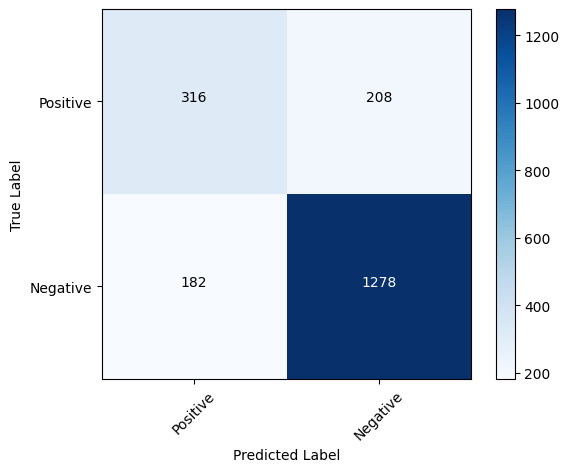

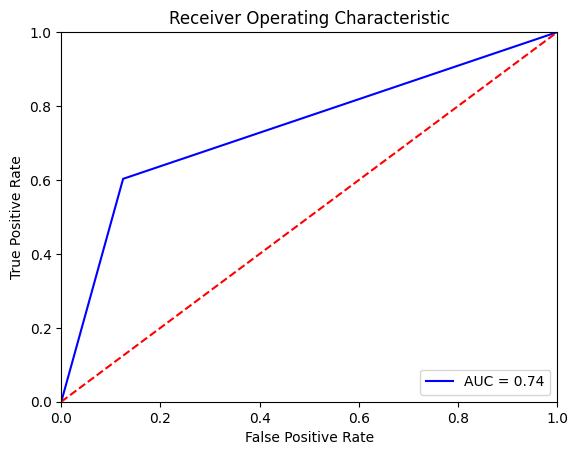

In [6]:
##############################################################################
# Prepare data

# Specify explanatory variables
X = merged_df.loc[:, x_var_base]
y = pd.Series(merged_df.loc[:,'Churn'])

# Save column names
column_names = X.columns

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(X.values)

# Transform explanatory variables
X_scaled = scaler.transform(X.values)


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(    
            X.values,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)    


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(X_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = x_var_base )
os_data_y= pd.Series(data=os_data_y)

n_cross_sell = len(os_data_y[os_data_y==0])
n_no_cross_sell = len(os_data_y[os_data_y==0])
p_cross_sell = len(os_data_y[
    os_data_y==0])/len(os_data_x)
p_no_cross_sell = len(os_data_y[
    os_data_y==1])/len(os_data_x)



##############################################################################
# Create model

# INSTANTIATING the model object without hyperparameters
gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                         learning_rate = 0.1,
                                         n_estimators  = 100,
                                         criterion     = 'friedman_mse',
                                         max_depth     = 3,
                                         warm_start    = False,
                                         random_state  = 219)

# FIT step is needed as we are not using .best_estimator
gbm_default = gbm_default.fit(os_data_x.values, os_data_y)


# PREDICTING based on the testing set
gbm_default_pred = gbm_default.predict(X_test)


# Instantiate scores
gbm_default_train_score = gbm_default.score(os_data_x.values, os_data_y).round(4)
gbm_default_test_score  = gbm_default.score(X_test, y_test).round(4)
gbm_default_test_gap    = abs(gbm_default_test_score - gbm_default_train_score).round(4)
gbm_default_auc_score   = roc_auc_score(y_true  = y_test, y_score = gbm_default_pred).round(4)
gbm_default_report      = classification_report(y_test, 
                                       gbm_default_pred,
                                       target_names = ['Customer did not churn (0)',
                                                       'Customer churned (1)'])


# Evaluate performance using F1 score
gbm_f1 = f1_score(y_test, gbm_default_pred)
gbm_f1 = round(gbm_f1, 4)

print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM without feature engineering and not tuned

---------------------------------

GBM Training Score : {gbm_default_train_score}
GBM Testing Score  : {gbm_default_test_score}
GBM Train-Test Gap : {gbm_default_test_gap}
GBM AUC Score      : {gbm_default_auc_score}
GBM F-Score        : {gbm_f1}
---------------------------------
""")

# Unpack confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = gbm_default_pred).ravel()

print(f"""
=================== Classification Report ===================
""")
      
# Classification Report
print(gbm_default_report)

##############################################################################
# Plot Confusion Matrix

# Create matrix
confusion_matrix_array = np.array([[gbm_default_tp, gbm_default_fn], [gbm_default_fp, gbm_default_tn]])

# Plot matrix
plt.imshow(confusion_matrix_array, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Positive', 'Negative'], rotation=45)
plt.yticks(tick_marks, ['Positive', 'Negative'])
thresh = confusion_matrix_array.max() / 2.
for i, j in np.ndindex(confusion_matrix_array.shape):
    plt.text(j, i, confusion_matrix_array[i, j], horizontalalignment="center", color="white" if confusion_matrix_array[i, j] > thresh else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = gbm_default.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, gbm_default_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# Feature Engineering

In [7]:


# Define the bin labels
labels = [1,2,3]

# Use the cut function to bin the CreditScore column
merged_df['EstimatedSalary_binned'] = pd.cut(merged_df['EstimatedSalary'], 3, labels=labels)
merged_df['EstimatedSalary_low']  = merged_df['EstimatedSalary_binned'].apply(lambda x: 1 if x == 1 else 0)
merged_df['EstimatedSalary_medium']  = merged_df['EstimatedSalary_binned'].apply(lambda x: 1 if x == 2 else 0)
merged_df['EstimatedSalary_high']  = merged_df['EstimatedSalary_binned'].apply(lambda x: 1 if x == 3 else 0)

merged_df['CreditScore_binned'] = pd.cut(merged_df['EstimatedSalary'], 3, labels=labels)
merged_df['CreditScore_low']  = merged_df['CreditScore_binned'].apply(lambda x: 1 if x == 1 else 0)
merged_df['CreditScore_medium']  = merged_df['CreditScore_binned'].apply(lambda x: 1 if x == 2 else 0)
merged_df['CreditScore_high']  = merged_df['CreditScore_binned'].apply(lambda x: 1 if x == 3 else 0)

merged_df['Salary_low_Credit_low'] = merged_df['EstimatedSalary_low'] * merged_df['CreditScore_low'] 
merged_df['Salary_low_Credit_medium'] = merged_df['EstimatedSalary_low'] * merged_df['CreditScore_medium'] 
merged_df['Salary_low_Credit_high'] = merged_df['EstimatedSalary_low'] * merged_df['CreditScore_high'] 

merged_df['Salary_medium_Credit_low'] = merged_df['EstimatedSalary_medium'] * merged_df['CreditScore_low'] 
merged_df['Salary_medium_Credit_medium'] = merged_df['EstimatedSalary_medium'] * merged_df['CreditScore_medium'] 
merged_df['Salary_medium_Credit_high'] = merged_df['EstimatedSalary_medium'] * merged_df['CreditScore_high'] 

merged_df['Salary_high_Credit_low'] = merged_df['EstimatedSalary_high'] * merged_df['CreditScore_low'] 
merged_df['Salary_high_Credit_medium'] = merged_df['EstimatedSalary_high'] * merged_df['CreditScore_medium'] 
merged_df['Salary_high_Credit_high'] = merged_df['EstimatedSalary_high'] * merged_df['CreditScore_high'] 


#ratio of monthly charges to total charges
merged_df['MonthlyTotalRatio'] = merged_df['MonthlyCharges'] / merged_df['TotalCharges'] 


merged_df['high_salary_x_fiber_optic'] =  merged_df['MonthlyTotalRatio'] * merged_df['EstimatedSalary']

#merged_df['AvgMonthlyCharge'] = merged_df['TotalCharges'] / merged_df['tenure']


In [8]:
x_var = ['gender',
       'SeniorCitizen',
       'Partner',
       'tenure',
       'PhoneService',
       'PaperlessBilling',

      # 'TotalCharges', 
       #'TotalCharges_log',

       'CreditScore', 
       'EstimatedSalary',
     #  'MonthlyCharges', 
       'Dependents', 
       #'Charge',
       'MultipleLines_No',
       'MultipleLines_No phone service', 
       #'MultipleLines_Yes',
       'InternetService_DSL', 
       'InternetService_Fiber optic',
       'InternetService_No', 
       'OnlineSecurity_No',
       #'OnlineSecurity_No internet service', 
       #'OnlineSecurity_Yes',

       'OnlineBackup_No', 
       #'OnlineBackup_No internet service',
       #'OnlineBackup_Yes',  

       'DeviceProtection_No', 
       'DeviceProtection_No internet service', 
       # 'DeviceProtection_Yes', 
       'TechSupport_No', 
       #'TechSupport_No internet service', 
       'TechSupport_Yes',
       'StreamingTV_No', 
       #'StreamingTV_No internet service', 
       'StreamingTV_Yes',
       #'StreamingMovies_No',
       #'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 

       'Contract_Month-to-month', 
       'Contract_One year',
       'Contract_Two year', 

      # 'Geography_France', 
       'Geography_Germany',
       'Geography_Spain', 

       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 
       'PaymentMethod_Mailed check',

       ######## New Features ########
       'MonthlyTotalRatio',
       'high_salary_x_fiber_optic',
       #'MonthlyTotalRatio_x_fiber_optic',

       'EstimatedSalary_low',
       #'EstimatedSalary_medium',
       #'EstimatedSalary_high',

       #'CreditScore_low',
       'CreditScore_medium',
       'CreditScore_high',
       
       #'Salary_low_Credit_low',
       'Salary_low_Credit_medium',
       'Salary_low_Credit_high',

       'Salary_medium_Credit_low',
       #'Salary_medium_Credit_medium',
       'Salary_medium_Credit_high',

       'Salary_high_Credit_low',
       'Salary_high_Credit_medium',
       #'Salary_high_Credit_high'
       
        ]


y_data = merged_df.loc[ : , 'Churn']
x_data = merged_df.loc[ : , x_var]


# GBM (not tuned)

/Users/markboenigk/Documents/GitHub/MBAN_Portfolio_PRIVATE/virtualenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(



=================== MODEL SUMMARY ===================

Model Type: GBM (not tuned)

---------------------------------

GBM Training Score : 0.8787
GBM Testing Score  : 0.8029
GBM Train-Test Gap : 0.0758
GBM AUC Score      : 0.734
GBM F-Score        : 0.6117
---------------------------------


=================== Classification Report ===================

                            precision    recall  f1-score   support

Customer did not churn (0)       0.86      0.88      0.87      1460
      Customer churned (1)       0.64      0.59      0.61       524

                  accuracy                           0.80      1984
                 macro avg       0.75      0.73      0.74      1984
              weighted avg       0.80      0.80      0.80      1984



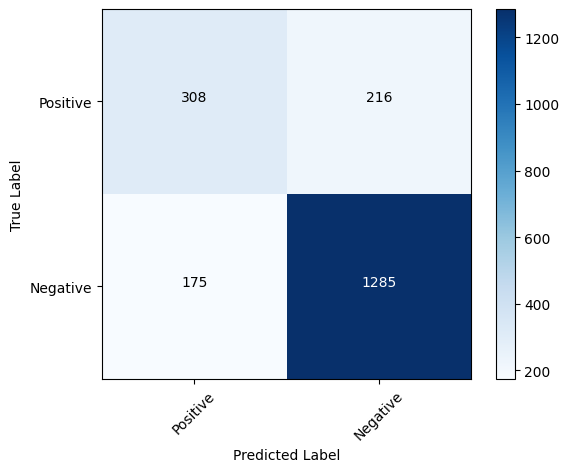

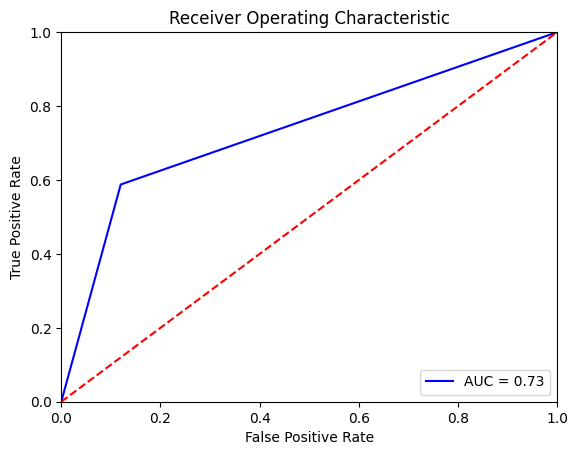

In [9]:
##############################################################################
# Prepare data

# Specify explanatory variables
X = merged_df.loc[:, x_var]
y = pd.Series(merged_df.loc[:,'Churn'])

# Save column names
column_names = X.columns

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(X.values)

# Transform explanatory variables
X_scaled = scaler.transform(X.values)


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X.values,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)    


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(X_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = x_var )
os_data_y= pd.Series(data=os_data_y)

n_cross_sell = len(os_data_y[os_data_y==0])
n_no_cross_sell = len(os_data_y[os_data_y==0])
p_cross_sell = len(os_data_y[
    os_data_y==0])/len(os_data_x)
p_no_cross_sell = len(os_data_y[
    os_data_y==1])/len(os_data_x)



##############################################################################
# Create model

# INSTANTIATING the model object without hyperparameters
gbm_base = GradientBoostingClassifier(loss          = 'deviance',
                                         learning_rate = 0.1,
                                         n_estimators  = 100,
                                         criterion     = 'friedman_mse',
                                         max_depth     = 3,
                                         warm_start    = False,
                                         random_state  = 219)

# FIT step is needed as we are not using .best_estimator
gbm_base = gbm_base.fit(os_data_x.values, os_data_y)


# PREDICTING based on the testing set
gbm_base_pred = gbm_base.predict(X_test)


# Instantiate scores
gbm_base_train_score = gbm_base.score(os_data_x.values, os_data_y).round(4)
gbm_base_test_score  = gbm_base.score(X_test, y_test).round(4)
gbm_base_test_gap    = abs(gbm_base_test_score - gbm_base_train_score).round(4)
gbm_base_auc_score   = roc_auc_score(y_true  = y_test, y_score = gbm_base_pred).round(4)
gbm_base_report      = classification_report(y_test, 
                                       gbm_base_pred,
                                       target_names = ['Customer did not churn (0)',
                                                       'Customer churned (1)'])

# Evaluate performance using F1 score
gbm_base_f1 = f1_score(y_test, gbm_base_pred)
gbm_base_f1 = round(gbm_base_f1, 4)

print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM (not tuned)

---------------------------------

GBM Training Score : {gbm_base_train_score}
GBM Testing Score  : {gbm_base_test_score}
GBM Train-Test Gap : {gbm_base_test_gap}
GBM AUC Score      : {gbm_base_auc_score}
GBM F-Score        : {gbm_base_f1}
---------------------------------
""")

# Unpack confusion matrix
gbm_base_tn, \
gbm_base_fp, \
gbm_base_fn, \
gbm_base_tp = confusion_matrix(y_true = y_test, y_pred = gbm_base_pred).ravel()

print(f"""
=================== Classification Report ===================
""")
      
# Classification Report
print(gbm_base_report)


##############################################################################
# Plot Confusion Matrix

# Create matrix
confusion_matrix_array = np.array([[gbm_base_tp, gbm_base_fn], [gbm_base_fp, gbm_base_tn]])

# Plot matrix
plt.imshow(confusion_matrix_array, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Positive', 'Negative'], rotation=45)
plt.yticks(tick_marks, ['Positive', 'Negative'])
thresh = confusion_matrix_array.max() / 2.
for i, j in np.ndindex(confusion_matrix_array.shape):
    plt.text(j, i, confusion_matrix_array[i, j], horizontalalignment="center", color="white" if confusion_matrix_array[i, j] > thresh else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = gbm_base.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, gbm_base_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



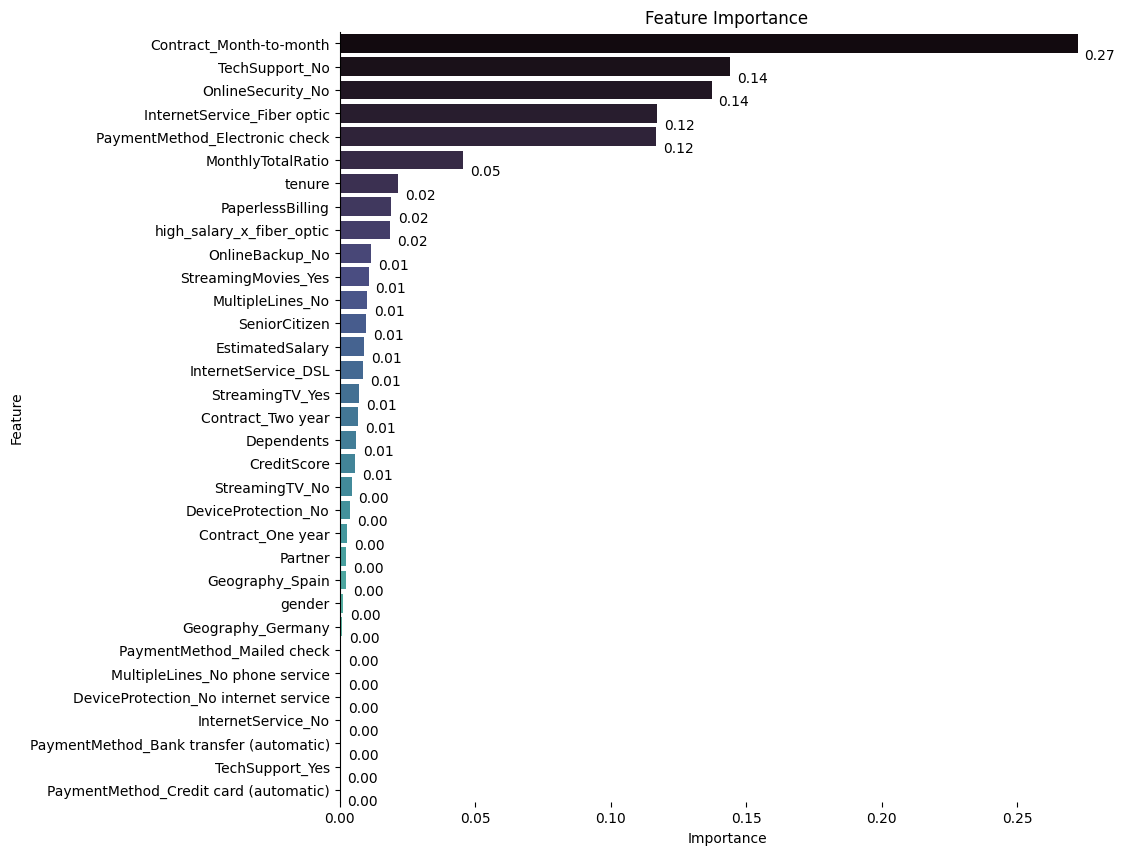

In [10]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(gbm_base.feature_importances_, os_data_x.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# GBM Tuned


=================== MODEL SUMMARY ===================

Model Type: GBM Tuned

Model Size: 44

---------------------------------

Tuned GBM Training Score : 0.8248
Tuned GBM Testing Score  : 0.9289
Tuned GBM Train-Test Gap : 0.1041
Tuned GBM AUC Score      : 0.8948
Tuned GBM F-Score        : 0.8594
---------------------------------



=================== Classification Report & F-Score ===================

                            precision    recall  f1-score   support

Customer did not churn (0)       0.94      0.97      0.95      1460
      Customer churned (1)       0.90      0.82      0.86       524

                  accuracy                           0.93      1984
                 macro avg       0.92      0.89      0.91      1984
              weighted avg       0.93      0.93      0.93      1984



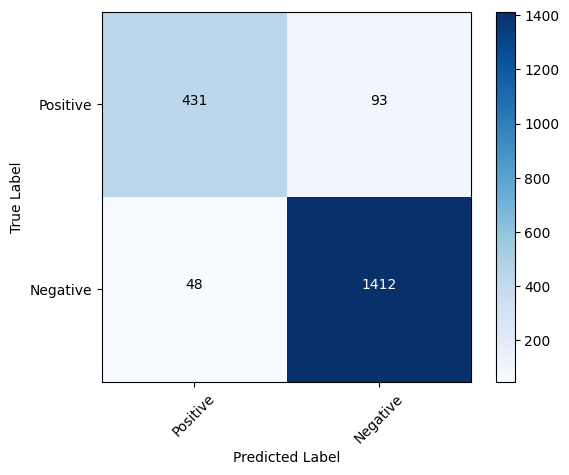

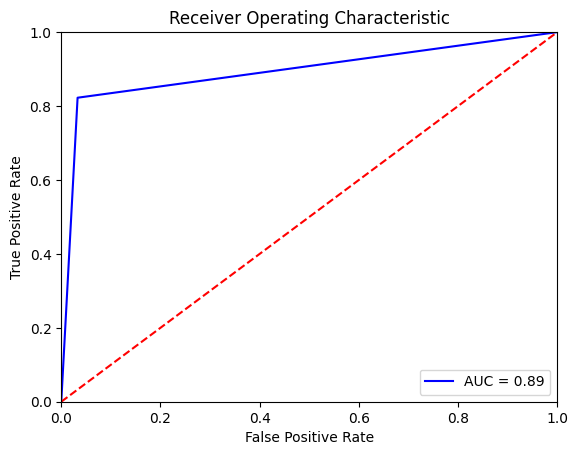

In [11]:

##############################################################################
# Prepare data

# Specify explanatory variables
X = merged_df.loc[:, x_var]
y = pd.Series(merged_df.loc[:,'Churn'])

# Save column names
column_names = X.columns

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(X.values)

# Transform explanatory variables
X_scaled = scaler.transform(X.values)


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            X.values,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)    


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(X_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = x_var )
os_data_y= pd.Series(data=os_data_y)

n_cross_sell = len(os_data_y[os_data_y==0])
n_no_cross_sell = len(os_data_y[os_data_y==0])
p_cross_sell = len(os_data_y[
    os_data_y==0])/len(os_data_x)
p_no_cross_sell = len(os_data_y[
    os_data_y==1])/len(os_data_x)


# GBM Tuned

# declaring a hyperparameter space
learn_space        = np.arange(0.1, 3.0, 0.1)
estimator_space    = np.arange(120, 150, 10)
depth_space        = np.arange(3, 5, 1)
warm_start_space   = [True, False]


# creating a hyperparameter grid
param_grid = {'learning_rate'     : learn_space,
              'n_estimators'      : estimator_space,
              'max_depth'         : depth_space,
              'warm_start'        : warm_start_space}

# INSTANTIATING the model object without hyperparameters
gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
gbm_cv = RandomizedSearchCV(estimator          = gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
gbm_cv.fit(X.values, y)


##############################################################################
# Create tuned model

# Instantiate a logistic regression model
gbm_tuned = gbm_cv.best_estimator_

# FIT step is needed as we are not using .best_estimator
gbm_tuned = gbm_tuned.fit(os_data_x.values, os_data_y)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(X_test)


# Instantiate scores
gbm_tuned_train_score = gbm_tuned.score(os_data_x.values, os_data_y).round(4)
gbm_tuned_test_score  = gbm_tuned.score(X_test, y_test).round(4)
gbm_tuned_test_gap    = abs(gbm_tuned_test_score - gbm_tuned_train_score).round(4)
gbm_tuned_auc_score   = roc_auc_score(y_true  = y_test, y_score = gbm_tuned_pred).round(4)
gbm_tuned_report      = classification_report(y_test, 
                                       gbm_tuned_pred,
                                       target_names = ['Customer did not churn (0)',
                                                       'Customer churned (1)'])

# Evaluate performance using F1 score
gbm_tuned_f1 = f1_score(y_test, gbm_tuned_pred)
gbm_tuned_f1 = round(gbm_tuned_f1, 4)

# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM Tuned

Model Size: {X.shape[1] + 1}

---------------------------------

Tuned GBM Training Score : {gbm_tuned_train_score}
Tuned GBM Testing Score  : {gbm_tuned_test_score}
Tuned GBM Train-Test Gap : {gbm_tuned_test_gap}
Tuned GBM AUC Score      : {gbm_tuned_auc_score}
Tuned GBM F-Score        : {gbm_tuned_f1}
---------------------------------

""")
      

print(f"""
=================== Classification Report & F-Score ===================
""")
      
# Classification Report and F-Score
print(gbm_tuned_report)

##############################################################################
# Plot Confusion Matrix

# Unpack confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()

# Create matrix
confusion_matrix_array = np.array([[gbm_tuned_tp, gbm_tuned_fn], [gbm_tuned_fp, gbm_tuned_tn]])

# Plot matrix
plt.imshow(confusion_matrix_array, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Positive', 'Negative'], rotation=45)
plt.yticks(tick_marks, ['Positive', 'Negative'])
thresh = confusion_matrix_array.max() / 2.
for i, j in np.ndindex(confusion_matrix_array.shape):
    plt.text(j, i, confusion_matrix_array[i, j], horizontalalignment="center", color="white" if confusion_matrix_array[i, j] > thresh else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = gbm_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, gbm_tuned_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




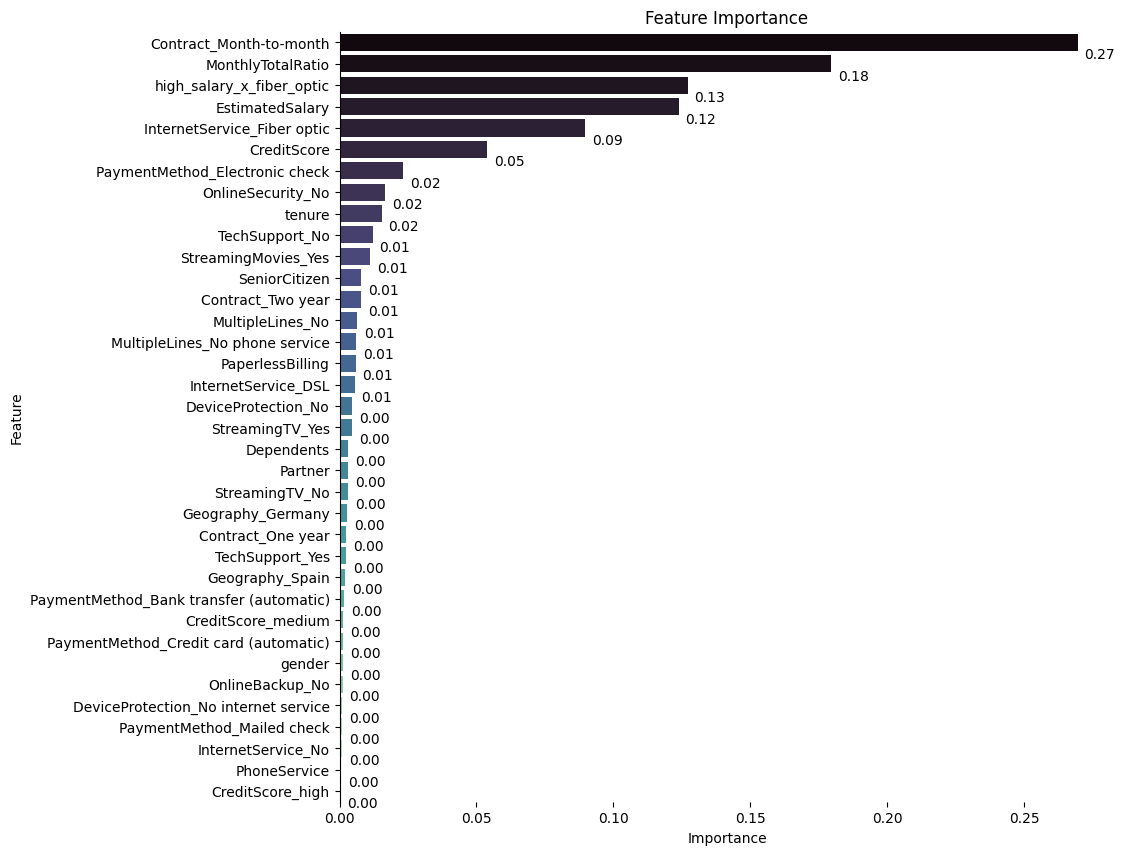

In [12]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(gbm_tuned.feature_importances_, os_data_x.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# Results

In [13]:
print(f"""

======================================== Model Comparison ========================================

Model           F-Score    Train Acc.   Test Acc.     Gap         AUC Score    TN,  FP, FN,  TP
-----           --------    ----------   ---------     ------      ---------    ----------------
GBM (Base)      {gbm_base_f1}       {gbm_base_train_score}       {gbm_base_test_score}        {gbm_base_test_gap}      {gbm_base_auc_score}       {gbm_base_tn, gbm_base_fp, gbm_base_fn, gbm_base_tp}
GBM             {gbm_f1}       {gbm_default_train_score}       {gbm_default_test_score}        {gbm_default_test_gap}      {gbm_default_auc_score}       {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
GBM Tuned       {gbm_tuned_f1}       {gbm_tuned_train_score}       {gbm_tuned_test_score}        {gbm_tuned_test_gap}      {gbm_tuned_auc_score}       {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}

GBM (Default) = Gradient Boost Model without feature engineering
GBM (Base)    = Gradient Boost Model with feature engineering
GBM Tuned     = Gradient Boost Model tuned  with feature engineering         
""")



======================================== Model Comparison ========================================

Model           F-Score    Train Acc.   Test Acc.     Gap         AUC Score    TN,  FP, FN,  TP
-----           --------    ----------   ---------     ------      ---------    ----------------
GBM (Base)      0.6117       0.8787       0.8029        0.0758      0.734       (1285, 175, 216, 308)
GBM             0.6184       0.8792       0.8034        0.0758      0.7392       (1278, 182, 208, 316)
GBM Tuned       0.8594       0.8248       0.9289        0.1041      0.8948       (1412, 48, 93, 431)

GBM (Default) = Gradient Boost Model without feature engineering
GBM (Base)    = Gradient Boost Model with feature engineering
GBM Tuned     = Gradient Boost Model tuned  with feature engineering         

